In [2]:
import json
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.set(rc={'axes.facecolor':'#E5E5E5'})
mpl.rcParams['font.family'] = 'Bitstream Vera Serif'

## General Plot Delta 

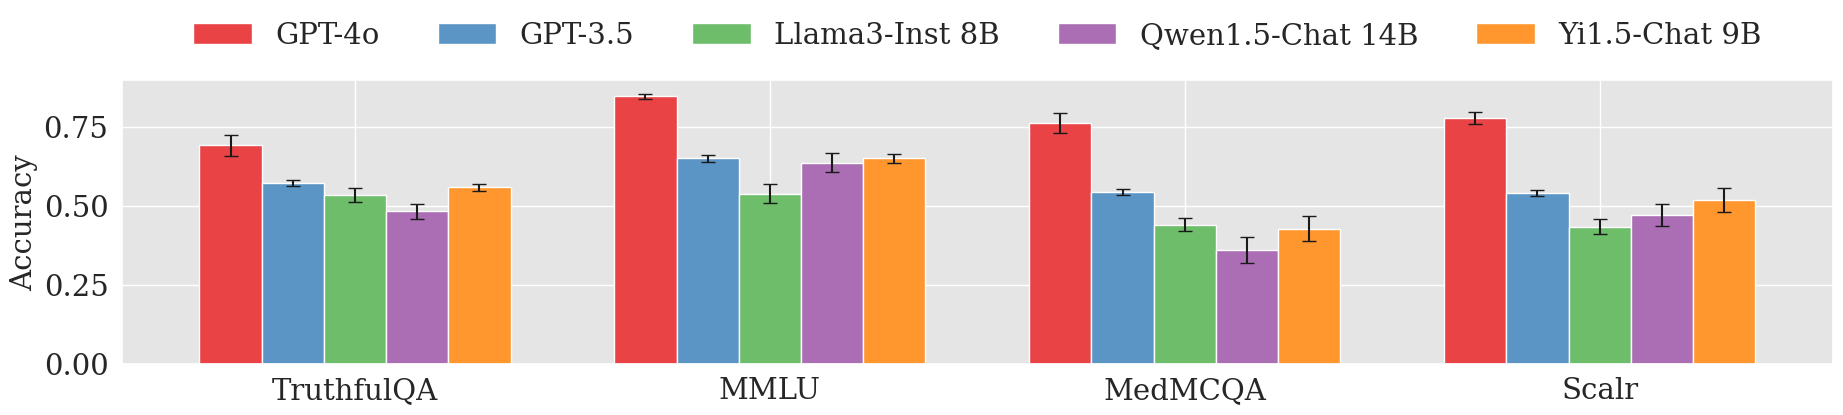

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, to_rgba

def lighten_color(color, amount=0.5):
    """ Lightens the given color by blending it with white.
    Input can be matplotlib color string, hex string, or RGB tuple.
    Amount should be between 0 and 1. """
    try:
        c = np.array(to_rgba(color))
        white = np.array([1, 1, 1, 1])
        return (1 - amount) * c + amount * white
    except ValueError:
        raise ValueError(f"Invalid color: {color}")

# Data for the plot
categories = ['TruthfulQA', 'MMLU', 'MedMCQA', 'Scalr']

gpt_4o = [0.692, 0.846, 0.762, 0.778]
gpt_3_5 = [0.572, 0.65, 0.544, 0.54]
llama3_instruct = [0.534, 0.538, 0.44, 0.434]
qwen_chat = [0.482, 0.636, 0.36, 0.472]
yi_chat = [0.558, 0.65, 0.428, 0.518]

# Example standard deviations for error bars (these should ideally come from your data)
gpt_4o_std = [0.033, 0.008, 0.031, 0.02]
gpt_3_5_std = [0.01, 0.01, 0.01, 0.01]
llama3_instruct_std = [0.023, 0.03, 0.02, 0.024]
qwen_chat_std = [0.024, 0.03, 0.042, 0.035]
yi_chat_std = [0.011, 0.014, 0.04, 0.037]

x = np.arange(len(categories))
width = 0.15  # the width of the bars

# Using the 'Set1' colormap
original_colors = plt.cm.Set1.colors
light_colors = [lighten_color(color, 0.18) for color in original_colors]

fig, ax = plt.subplots(figsize=(19,4.5))
rects0 = ax.bar(x - 2*width, gpt_4o, width, label='GPT-4o', color=light_colors[0], yerr=gpt_4o_std, capsize=5)  # Lightened Set1 color 0
rects1 = ax.bar(x - 1*width, gpt_3_5, width, label='GPT-3.5', color=light_colors[1], yerr=gpt_3_5_std, capsize=5)  # Lightened Set1 color 0
rects2 = ax.bar(x - 0*width, llama3_instruct, width, label='Llama3-Inst 8B', color=light_colors[2], yerr=llama3_instruct_std, capsize=5)  # Lightened Set1 color 1
rects3 = ax.bar(x + 1*width, qwen_chat, width, label='Qwen1.5-Chat 14B', color=light_colors[3], yerr=qwen_chat_std, capsize=5)  # Lightened Set1 color 2
rects4 = ax.bar(x + 2*width, yi_chat, width, label='Yi1.5-Chat 9B', color=light_colors[4], yerr=yi_chat_std, capsize=5)  # Lightened Set1 color 3
# rects3 = ax.bar(x + 0.5*width, llama, width, label='LLaMA', color=light_colors[2], yerr=llama_std, capsize=5)  # Lightened Set1 color 2
# rects4 = ax.bar(x + 1.5*width, flan_t5, width, label='FLAN-T5', color=light_colors[3], yerr=flan_t5_std, capsize=5)  # Lightened Set1 color 3

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('')
ax.set_ylabel('Accuracy', fontsize=21)
# ax.set_title('Normal', fontsize=21)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=21)
ax.tick_params(axis='y', labelsize=21)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=5, frameon=False, fontsize=21)


fig.tight_layout()

plt.show()


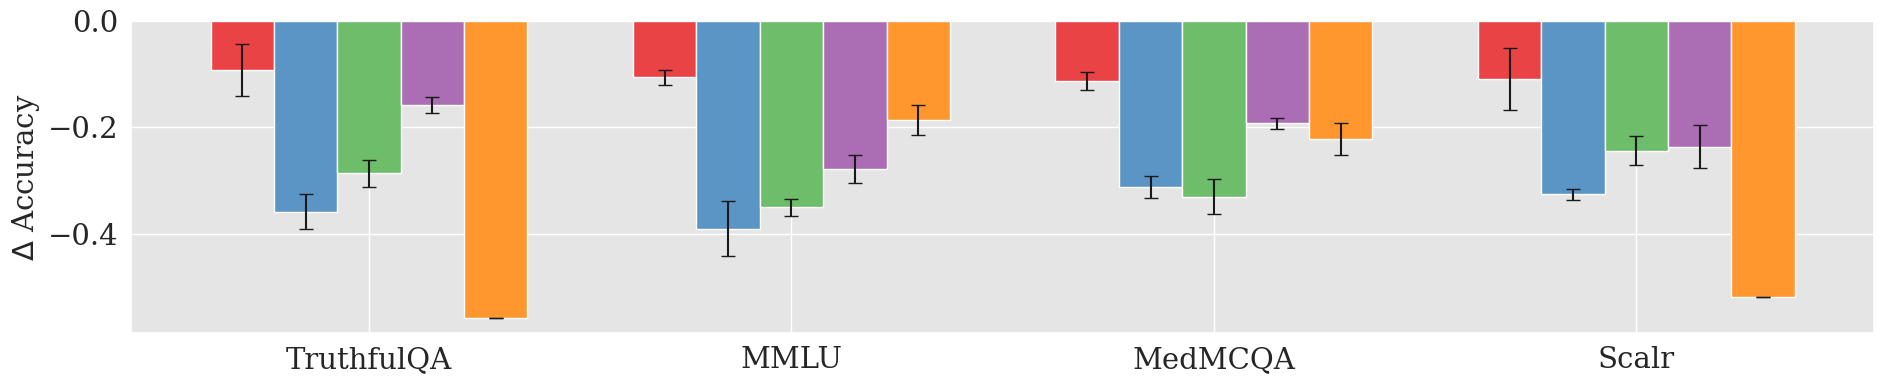

In [3]:
# Data for the plot
categories = ['TruthfulQA', 'MMLU', 'MedMCQA', 'Scalr']

attack_gpt_4o = [0.6, 0.74, 0.649, 0.669]
attack_gpt_3_5 = [0.214, 0.260, 0.232, 0.214]
attack_llama3_instruct = [0.248, 0.188, 0.11, 0.19]
attack_qwen_chat = [0.324, 0.358, 0.168, 0.236]
attack_yi_chat = [0.0, 0.464, 0.206, 0.0]

delta_gtp_4o = np.array(attack_gpt_4o) - np.array(gpt_4o)
delta_gpt_35 = np.array(attack_gpt_3_5) - np.array(gpt_3_5) 
delta_llama3_instruct = np.array(attack_llama3_instruct) - np.array(llama3_instruct)
delta_qwen_chat = np.array(attack_qwen_chat) - np.array(qwen_chat)
delta_yi_chat = np.array(attack_yi_chat) - np.array(yi_chat)

# Example standard deviations for error bars (these should ideally come from your data)
attack_gpt_4o_std = [0.048, 0.014, 0.017, 0.058]
attack_gpt_3_5_std = [0.033, 0.052, 0.02, 0.01]
attack_llama3_instruct_std = [0.0256, 0.016, 0.033, 0.027] 
attack_qwen_chat_std = [0.015, 0.027, 0.01, 0.04]
attack_yi_chat_std = [0.0, 0.028, 0.03, 0.0]



x = np.arange(len(categories))
width = 0.15  # the width of the bars

# Using the 'Set1' colormap
original_colors = plt.cm.Set1.colors
light_colors = [lighten_color(color, 0.18) for color in original_colors]

fig, ax = plt.subplots(figsize=(19,4))
rects0 = ax.bar(x - 2*width, delta_gtp_4o, width, label='GPT-4o', color=light_colors[0], yerr=attack_gpt_4o_std, capsize=5)  # Lightened Set1 color 0
rects1 = ax.bar(x - 1*width, delta_gpt_35, width, label='GPT-3.5', color=light_colors[1], yerr=attack_gpt_3_5_std, capsize=5)  # Lightened Set1 color 0
rects2 = ax.bar(x - 0*width, delta_llama3_instruct, width, label='Llama2-Chat', color=light_colors[2], yerr=attack_llama3_instruct_std, capsize=5)  # Lightened Set1 color 1
rects3 = ax.bar(x + 1*width, delta_qwen_chat, width, label='Qwen1.5-Chat 14B', color=light_colors[3], yerr=attack_qwen_chat_std, capsize=5)  # Lightened Set1 color 2
rects4 = ax.bar(x + 2*width, delta_yi_chat, width, label='Yi1.5-Chat 9B', color=light_colors[4], yerr=attack_yi_chat_std, capsize=5)  # Lightened Set1 color 3

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('')
ax.set_ylabel(r'$\Delta$ Accuracy', fontsize=21)
# ax.set_title('Attack', fontsize=21)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=21)
ax.tick_params(axis='y', labelsize=21)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=18)

fig.tight_layout()

plt.show()

## Measuring Accuracy, Measuring Agreement


In [60]:
results = {
    "truthfulqa": 
    {
        "gpt35_gpt35_acc": np.array([
            [0.068, 0.104, 0.11],
            [0.56, 0.404, 0.274],
            [0.55, 0.424, 0.292]
            ]),
        "majority_vote_acc": np.array([0.472, 0.344, 0.216]),
        "gpt35_gpt35_agreement": np.array([
            [0.227, 0.367, 0.628],
            [0.477, 0.513, 0.669],
            [0.474, 0.524, 0.653]
            ]) 
    },

    "mmlu": 
    {
        "gpt35_gpt35_acc": np.array([
            [0.182, 0.112, 0.116],
            [0.598, 0.542, 0.318],
            [0.634, 0.512, 0.352]
            ]),
        
        "majority_vote_acc": np.array([0.556, 0.434, 0.26]),

        "gpt35_gpt35_agreement": np.array([
            [0.325, 0.347, 0.6],
            [0.546, 0.499, 0.656],
            [0.543, 0.51, 0.642]
            ])
    },

    "medmcqa": {
        "gpt35_gpt35_acc": np.array([
            [0.086, 0.092, 0.128],
            [0.534, 0.428, 0.3],
            [0.538, 0.406, 0.312]
            ]),

        "majority_vote_acc": np.array([0.432, 0.316, 0.232]),

        "gpt35_gpt35_agreement": np.array([
            [0.24, 0.448, 0.638],
            [0.452, 0.538, 0.663],
            [0.434, 0.552, 0.645]
            ])
    },

    "scalr": {
        "gpt35_gpt35_acc": np.array([
            [0.068, 0.032, 0.028],
            [0.516, 0.444, 0.316],
            [0.55, 0.434, 0.33]
            ]),

        "majority_vote_acc": np.array([0.436, 0.334, 0.214]),

        "gpt35_gpt35_agreement": np.array([
            [0.158, 0.303, 0.508],
            [0.404, 0.452, 0.559],
            [0.414, 0.451, 0.563]
            ])
    }
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


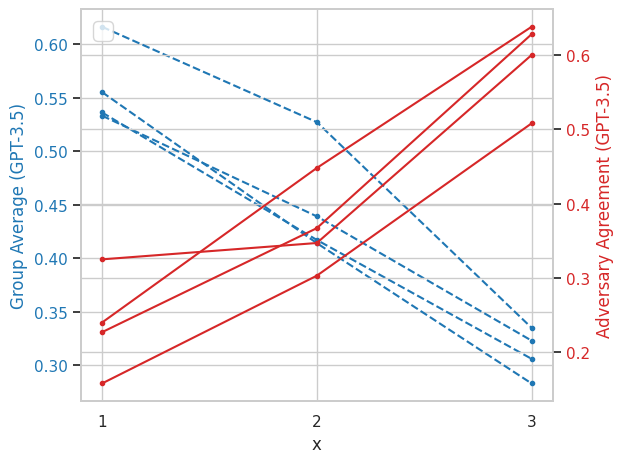

In [61]:

# Assuming 'x', 'y1', and 'y2' are your data
n_rounds = 3
x = (np.arange(n_rounds) + 1).astype(str)

fig, ax1 = plt.subplots()

# Plot the data on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('x')
ax1.set_ylabel('Group Average (GPT-3.5)', color=color)
ax1.plot(x, np.mean(results['truthfulqa']['gpt35_gpt35_acc'][1:], axis=0), color=color, marker='o', linestyle='--', markersize=3) # all except the adversary
ax1.plot(x, np.mean(results['mmlu']['gpt35_gpt35_acc'][1:], axis=0), color=color, marker='o', linestyle='--', markersize=3) # all except the adversary
ax1.plot(x, np.mean(results['medmcqa']['gpt35_gpt35_acc'][1:], axis=0), color=color, marker='o', linestyle='--', markersize=3) # all except the adversary
ax1.plot(x, np.mean(results['scalr']['gpt35_gpt35_acc'][1:], axis=0), color=color, marker='o', linestyle='--', markersize=3) # all except the adversary
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the data on the second y-axis
color = 'tab:red'
ax2.set_ylabel('Adversary Agreement (GPT-3.5)', color=color)
ax2.plot(x, results['truthfulqa']['gpt35_gpt35_agreement'][0], color=color,  marker='o', markersize=3)
ax2.plot(x, results['mmlu']['gpt35_gpt35_agreement'][0], color=color,  marker='o', markersize=3)
ax2.plot(x, results['medmcqa']['gpt35_gpt35_agreement'][0], color=color,  marker='o', markersize=3)
ax2.plot(x, results['scalr']['gpt35_gpt35_agreement'][0], color=color,  marker='o', markersize=3)
ax2.tick_params(axis='y', labelcolor=color)

# legend
ax1.legend(loc='upper left', fontsize=18)
fig.tight_layout()
plt.show()

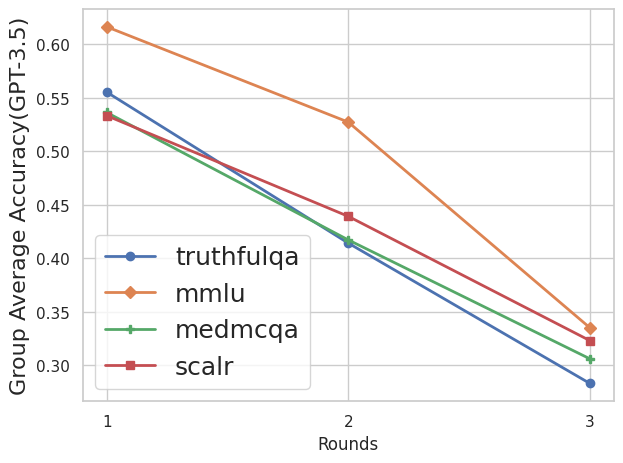

In [85]:
# Assuming 'x', 'y1', and 'y2' are your data
n_rounds = len(results['truthfulqa']['gpt35_gpt35_acc'])
x = (np.arange(n_rounds) + 1).astype(str)

# Create the first plot
fig, ax = plt.subplots()
ax.plot(x, np.mean(results['truthfulqa']['gpt35_gpt35_acc'][1:], axis=0), marker='o', markersize=6, linewidth=2, label="truthfulqa") # all except the adversary
ax.plot(x, np.mean(results['mmlu']['gpt35_gpt35_acc'][1:], axis=0), marker='D', markersize=6, linewidth=2, label="mmlu") # all except the adversary
ax.plot(x, np.mean(results['medmcqa']['gpt35_gpt35_acc'][1:], axis=0), marker='P', markersize=6, linewidth=2, label="medmcqa") # all except the adversary
ax.plot(x, np.mean(results['scalr']['gpt35_gpt35_acc'][1:], axis=0), marker='s', markersize=6, linewidth=2, label="scalr") # all except the adversary
ax.tick_params(axis='y')
ax.set_ylabel('Group Average Accuracy(GPT-3.5)', fontsize=16)
ax.set_xlabel('Rounds')
ax.legend(fontsize=18)
fig.tight_layout()
plt.show()

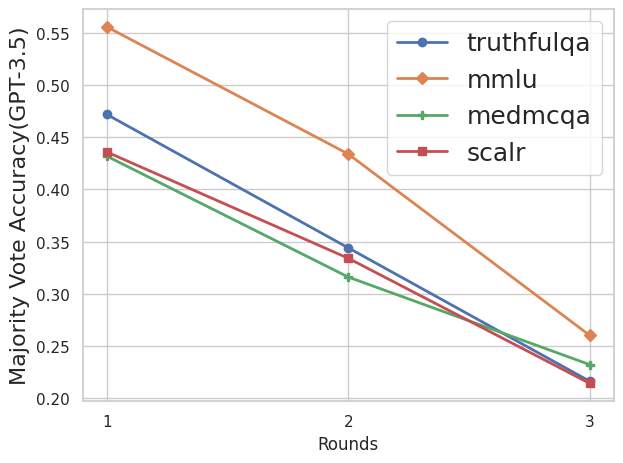

In [87]:
# Assuming 'x', 'y1', and 'y2' are your data
n_rounds = len(results['truthfulqa']['gpt35_gpt35_acc'])
x = (np.arange(n_rounds) + 1).astype(str)

# Create the first plot
fig, ax = plt.subplots()
ax.plot(x, results['truthfulqa']['majority_vote_acc'], marker='o', markersize=6, linewidth=2, label="truthfulqa") # all except the adversary
ax.plot(x, results['mmlu']['majority_vote_acc'], marker='D', markersize=6, linewidth=2, label="mmlu") # all except the adversary
ax.plot(x, results['medmcqa']['majority_vote_acc'], marker='P', markersize=6, linewidth=2, label="medmcqa") # all except the adversary
ax.plot(x, results['scalr']['majority_vote_acc'], marker='s', markersize=6, linewidth=2, label="scalr") # all except the adversary
ax.tick_params(axis='y')
ax.set_ylabel('Majority Vote Accuracy(GPT-3.5)', fontsize=16)
ax.set_xlabel('Rounds')
ax.legend(fontsize=18)
fig.tight_layout()
plt.show()

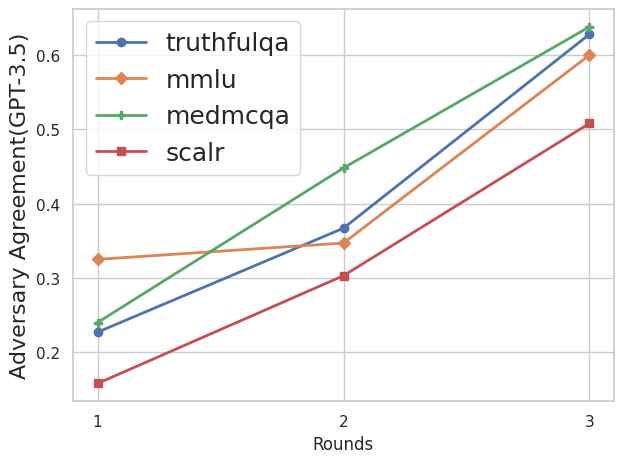

In [88]:
# Assuming 'x', 'y1', and 'y2' are your data
n_rounds = len(results['truthfulqa']['gpt35_gpt35_acc'])
x = (np.arange(n_rounds) + 1).astype(str)

# Create the first plot
fig, ax = plt.subplots()
ax.plot(x, results['truthfulqa']['gpt35_gpt35_agreement'][0], marker='o', markersize=6, linewidth=2, label="truthfulqa") # all except the adversary
ax.plot(x, results['mmlu']['gpt35_gpt35_agreement'][0], marker='D', markersize=6, linewidth=2, label="mmlu") # all except the adversary
ax.plot(x, results['medmcqa']['gpt35_gpt35_agreement'][0], marker='P', markersize=6, linewidth=2, label="medmcqa") # all except the adversary
ax.plot(x, results['scalr']['gpt35_gpt35_agreement'][0], marker='s', markersize=6, linewidth=2, label="scalr") # all except the adversary
ax.tick_params(axis='y')
ax.set_ylabel('Adversary Agreement(GPT-3.5)', fontsize=16)
ax.set_xlabel('Rounds')
ax.legend(fontsize=18)
fig.tight_layout()
plt.show()

In [80]:
# missing plot for judge

In [111]:
def compute_attack_ratio(accuracy, agreement):
    acc_diff = accuracy[0] - accuracy[-1]
    agreement_diff = agreement[-1] - agreement[0]
    attack_ratio = acc_diff / agreement_diff
    return acc_diff, agreement_diff, attack_ratio

In [112]:
ratios = {}
for dataset, data in results.items():
    acc_diff, agreement_diff, attack_ratio = compute_attack_ratio(
        np.mean(data['gpt35_gpt35_acc'][1:], axis=0),
        data['gpt35_gpt35_agreement'][0]
        )
    ratios[dataset] = (acc_diff, agreement_diff, attack_ratio)

In [113]:
ratios

{'truthfulqa': (0.272, 0.401, 0.6783042394014963),
 'mmlu': (0.281, 0.27499999999999997, 1.021818181818182),
 'medmcqa': (0.23000000000000004, 0.398, 0.577889447236181),
 'scalr': (0.21000000000000002, 0.35, 0.6000000000000001)}

## Plot Ablation Study


In [115]:
rounds_results = {
    "truthfulqa": {
        "no_attack_gpt35":
        {
            "acc": np.array([
                [0.574,0.556,0.578,0.58,0.582,0.59,0.576,0.588,0.58],
                [0.544,0.578,0.568,0.582,0.586,0.582,0.596,0.586,0.596],
                [0.56,0.584,0.588,0.584,0.59,0.594,0.596,0.594,0.592]
            ]),
            "majority_vote_acc": np.array([0.558,0.576,0.576,0.584,0.592,0.598,0.596,0.596,0.596]),
            "agreement": np.array([
                [0.748,0.824,0.887,0.914,0.939,0.947,0.954,0.959,0.961],
                [0.73,0.828,0.902,0.93,0.945,0.954,0.96,0.963,0.962],
                [0.744,0.832,0.909,0.928,0.946,0.949,0.952,0.962,0.965]
            ])
        },

        "attack_gpt35_gpt35":
        {
            "acc": np.array([
                [0.102,0.076,0.07,0.058,0.056,0.05,0.048,0.044,0.04],
                [0.576,0.446,0.254,0.198,0.174,0.168,0.142,0.146,0.134],
                [0.564,0.434,0.25,0.228,0.176,0.162,0.164,0.15,0.144]
            ]),
            "majority_vote_acc": np.array([0.492,0.36,0.184,0.16,0.144,0.14,0.128,0.126,0.116]),
            "agreement":np.array([
                [0.253,0.427,0.685,0.747,0.786,0.807,0.833,0.839,0.84],
                [0.509,0.563,0.715,0.793,0.83,0.854,0.882,0.885,0.881],
                [0.504,0.546,0.71,0.768,0.83,0.847,0.865,0.872,0.871]
            ])
        }
    }
}

### Rounds

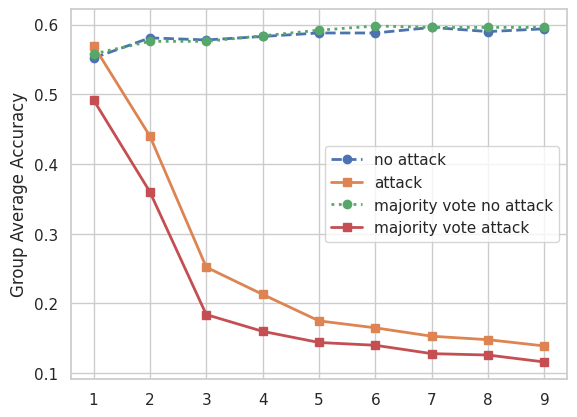

In [145]:
n_rounds = len(rounds_results['truthfulqa']['no_attack_gpt35']["majority_vote_acc"])
x = (np.arange(n_rounds) + 1).astype(str)

fig, ax = plt.subplots()

# Plot the data on the first y-axis
ax.set_ylabel('Group Average Accuracy')
ax.plot(x, np.mean(rounds_results["truthfulqa"]["no_attack_gpt35"]["acc"][1:], axis=0), marker='o', markersize=6, linewidth=2, linestyle='--', label="no attack") # all except the adversary
ax.plot(x, np.mean(rounds_results["truthfulqa"]["attack_gpt35_gpt35"]["acc"][1:], axis=0), marker='s', markersize=6, linewidth=2, label="attack") # all except the adversary

ax.plot(x, rounds_results["truthfulqa"]["no_attack_gpt35"]["majority_vote_acc"], marker='o', markersize=6, linewidth=2, linestyle=':', label="majority vote no attack") # all except the adversary
ax.plot(x, rounds_results["truthfulqa"]["attack_gpt35_gpt35"]["majority_vote_acc"], marker='s', markersize=6, linewidth=2, label="majority vote attack") # all except the adversary
# Create a second y-axis that shares the same x-axis
plt.legend()

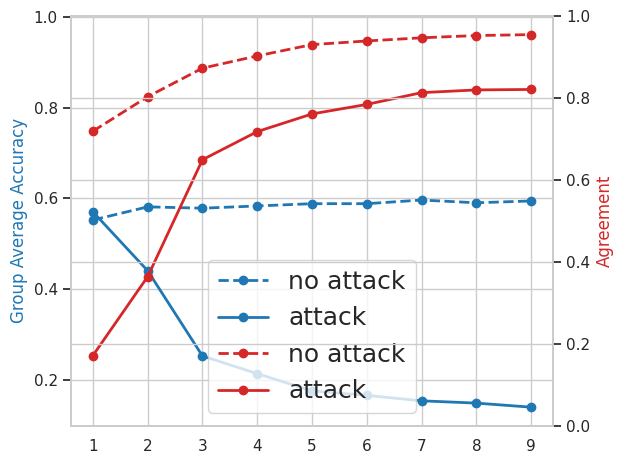

In [137]:
# Assuming 'x', 'y1', and 'y2' are your data
n_rounds = len(rounds_results['truthfulqa']['no_attack_gpt35']["majority_vote_acc"])
x = (np.arange(n_rounds) + 1).astype(str)

fig, ax1 = plt.subplots()

# Plot the data on the first y-axis
color = 'tab:blue'
ax1.set_ylabel('Group Average Accuracy', color=color)
ax1.plot(x, np.mean(rounds_results["truthfulqa"]["no_attack_gpt35"]["acc"][1:], axis=0), marker='o', markersize=6, linewidth=2, linestyle='--', label="no attack", color=color) # all except the adversary
ax1.plot(x, np.mean(rounds_results["truthfulqa"]["attack_gpt35_gpt35"]["acc"][1:], axis=0), marker='o', markersize=6, linewidth=2, label="attack", color=color) # all except the adversary
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the data on the second y-axis
color = 'tab:red'
ax2.set_ylabel('Agreement', color=color)
ax1.plot(x, rounds_results["truthfulqa"]["no_attack_gpt35"]["agreement"][0], marker='o', markersize=6, linewidth=2, linestyle='--', label="no attack", color=color) # all except the adversary
ax1.plot(x, rounds_results["truthfulqa"]["attack_gpt35_gpt35"]["agreement"][0], marker='o', markersize=6, linewidth=2, label="attack", color=color) # all except the adversary

# legend
ax1.legend(fontsize=18)
fig.tight_layout()
plt.show()

### Multiple Agents

In [157]:
results_agents = {
    "2": {
        "majority_vote_acc": np.array([0.066, 0.042, 0.04])                                            
    },
    "3": {
        "majority_vote_acc": np.array([0.498,0.348,0.214])                                            
    },
    "4": {
        "majority_vote_acc": np.array([0.498,0.424,0.236])                                            
    },
    "5": {
        "majority_vote_acc": np.array([0.536,0.472,0.362])                                            
    },
    "6": {
        "majority_vote_acc": np.array([0.57,0.494,0.356])
    }
    
}

In [159]:
data

{'majority_vote_acc': array([0.57 , 0.494, 0.356])}

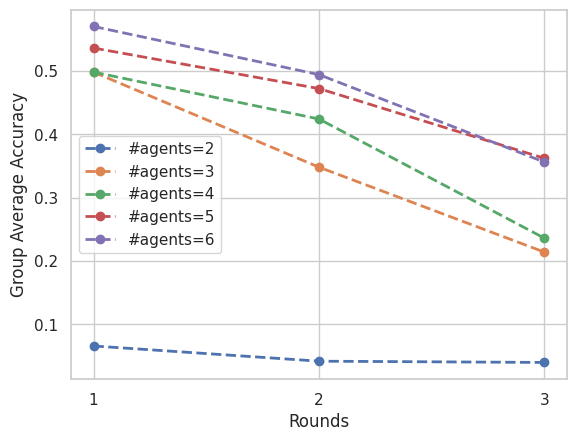

In [163]:
n_rounds = len(results_agents['2']['majority_vote_acc'])
x = (np.arange(n_rounds) + 1).astype(str)

fig, ax = plt.subplots()

# Plot the data on the first y-axis
ax.set_ylabel('Group Average Accuracy')
ax.set_xlabel('Rounds')
for n_agents, data in results_agents.items():
    ax.plot(x, data['majority_vote_acc'], marker='o', markersize=6, linewidth=2, linestyle='--', label=f"#agents={n_agents}") # all except the adversary
# Create a second y-axis that shares the same x-axis
plt.legend()

## Majority Vote Degradation

Blue Line (No Adversary): This represents the accuracy of the system when all three agents are honest. The accuracy increases with the probability P of an honest agent making a correct decision.


Red Line (One Adversary): This represents the accuracy when one of the agents is adversarial. As expected, the system's accuracy is lower compared to when there are no adversaries.

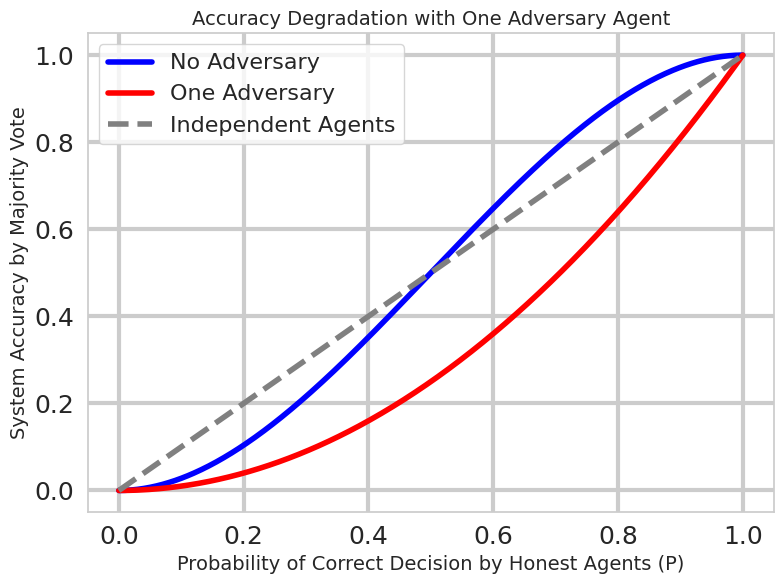

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Probability range for correct decision
P = np.linspace(0, 1, 500)

# Accuracy calculations
accuracy_no_adversary = P**3 + 3*P**2*(1-P)
accuracy_with_adversary = P**2

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(P, accuracy_no_adversary, label='No Adversary', color='blue', linewidth=4)
plt.plot(P, accuracy_with_adversary, label='One Adversary', color='red', linewidth=4)
# linear line for independen agent
plt.plot(P, P, label='Independent Agents', color='grey', linestyle='dashed', linewidth=4)
plt.xlabel('Probability of Correct Decision by Honest Agents (P)', fontsize=14)
plt.ylabel('System Accuracy by Majority Vote', fontsize=14)
plt.title('Accuracy Degradation with One Adversary Agent', fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.grid(True, linewidth=3)
plt.tight_layout()
plt.show()
